In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## DATASET

The final dataset is actually a merge of 10 different datasets : 
- The initial one 'books'  (As reference)
- 8 dataset "by genre" provided by GoodRead website (Children, Comics & Graphic, Fantasy & Paranormal, History & Biography, Mystery, triller & crime, Poetry, Romance, Young Adult)
- 1 dataset 'Fuzzy book genres' also provided by GoodRead website. 

In [79]:
# Initial dataset
Initial_books = pd.read_csv(r"C:\Users\ociri\OneDrive\Bureau\DSTI CLASSES\PYTHON LABS\PROJECT Books Rating\booksss.csv", index_col="bookID", sep=",", encoding='utf-8')

In [80]:
# final dataset 
books_df = pd.read_csv(r"C:\Users\ociri\OneDrive\Bureau\DSTI CLASSES\PYTHON LABS\PROJECT Books Rating\final_merged_dataset.csv", index_col="bookID", sep=",", encoding='utf-8')

## EXPLORING AND CLEANING DATA
I kept the missing values in the final dataset in order to have the same amount of rows as the initial dataset

In [81]:
books_df.shape

(11127, 12)

In [82]:
books_df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Genre
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;,Fantasy & paranormal
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;,Fantasy & paranormal
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic;;;,Fantasy & paranormal
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;,Children
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic;;;,Fantasy & paranormal


In [83]:
books_df.isna().sum()

title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
  num_pages              0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
Genre                 1861
dtype: int64

In [84]:
#Replace missing value in "Genre" according to the Author 
def fill_genre(x):
    if x.mode().size == 0:
        return x
    else:
        return x.fillna(x.mode()[0])

books_df['Genre'] = books_df.groupby('authors')['Genre'].transform(fill_genre)

In [85]:
books_df.isna().sum()

title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
  num_pages              0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
Genre                 1299
dtype: int64

In [86]:
# Replace Missing Values by "Other"
books_df['Genre'].fillna('Other', inplace=True)

In [87]:
books_df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
Genre                 0
dtype: int64

In [88]:
books_df.duplicated().any()                  #Checking if any duplicates in the dataset

False

In [89]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
 11  Genre               11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


In [90]:
#Removing extra space in the columns name
books_df = books_df.rename(columns={'  num_pages': 'num_pages'})

# Removing ';;;' in column name
books_df = books_df.rename(columns={'publisher;;;': 'publisher'})

# Removing ';;;' in the whole column
books_df['publisher'] = books_df['publisher'].str.replace(';', '', regex=False)

In [91]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'Genre'],
      dtype='object')

In [92]:
#Descriptive statistics across all the variables
books_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [93]:
books_df.shape

(11127, 12)

### Detecting and removing outliers/ anomalies 
We observe in the description table (code above)  that some attributes (average_rating/num_pages/ratings_count) have a min. of 0 - which is not acceptable.   "text_reviews_count" has also 0 as min, but it is acceptable for this attribute as readers can rate a book WITHOUT leaving a review.

#### ~ Average_rating Attribute ~

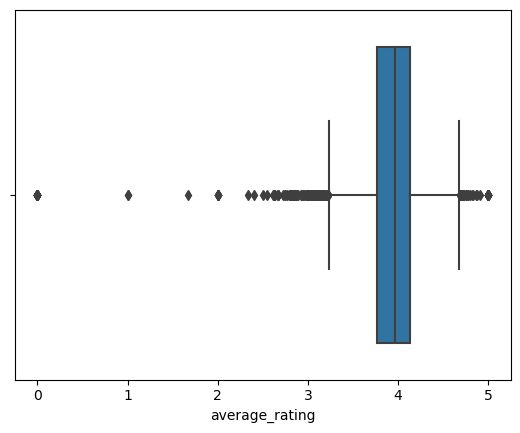

In [94]:
# Creating Boxplot for "average_rating" attribute
sns.boxplot(x=books_df['average_rating'])
plt.show()

In [95]:
(books_df.average_rating == 0).sum()       #Checking number of rows with average_rating == 0

26

In [96]:
# Print the specific columns for the DataFrame rating_zero
rating_zero = books_df.loc[books_df['average_rating'] == 0]             #Calling the rows with average_rating == 0
columns_to_print = ['num_pages', 'average_rating', 'ratings_count', 'text_reviews_count']
print(rating_zero[columns_to_print].head(10))

        num_pages  average_rating  ratings_count  text_reviews_count
bookID                                                              
799           295             0.0              0                   0
1302          112             0.0              0                   0
3351          200             0.0              0                   0
9337          228             0.0              0                   0
9338          304             0.0              0                   0
10200         222             0.0              0                   0
12712          71             0.0              0                   0
15186           5             0.0              0                   0
16806         386             0.0              0                   0
19257          63             0.0              0                   0


In [97]:
books_df.drop(index=rating_zero.index, inplace=True)              #Dropping them

#### ~ Ratings_count Attribute ~

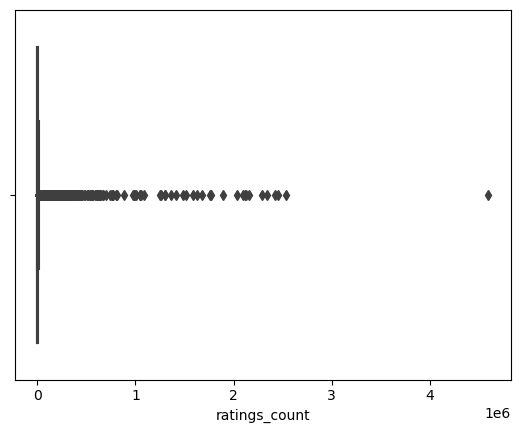

In [98]:
# Creating Boxplot for "ratings_count" attribute
sns.boxplot(x=books_df['ratings_count'])
plt.show()

In [99]:
#Removing anomalies : ratings_count == 0

No_rating = books_df.loc[books_df['ratings_count'] == 0]            #Calling the rows with ratings_count == 0
books_df.drop(index=No_rating.index, inplace=True)        

In [100]:
#Removing Outliers 

OutliersRC = books_df.loc[books_df['ratings_count'] >  4000000] 
books_df.drop(index=OutliersRC.index, inplace=True) 

#### ~ Num_pages Attribute ~
In this case we decided to replace the value 0 by the mean of the columns as most of the corresponding target value ('average_rating) are correct. Regarding the outliers, after checking online the 2 biggest one (BookID 24520 & 25587), they are actually boxed Set which explained the huge number of pages. We will consider them as Outlier and will remove them.

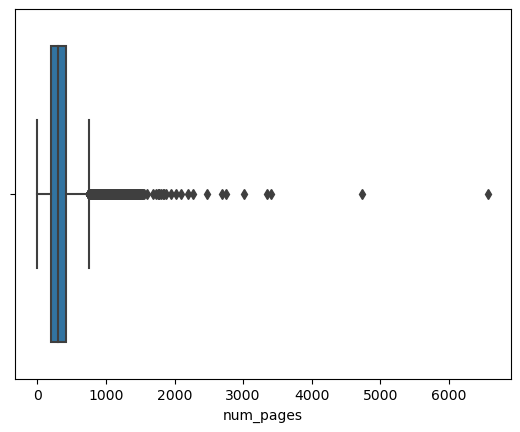

In [101]:
# Creating Boxplot for "num_pages" attribute
sns.boxplot(x=books_df['num_pages'])
plt.show()

In [102]:
(books_df.num_pages == 0).sum()            #Checking number of rows with num_pages == 0

75

In [103]:
# Print the specific columns for the DataFrame No_page
No_page = books_df.loc[books_df['num_pages'] == 0]
columns_to_print = ['num_pages', 'average_rating', 'ratings_count']
print(No_page[columns_to_print].head(10))

        num_pages  average_rating  ratings_count
bookID                                          
955             0            4.70             22
2835            0            3.79              3
3593            0            4.00              7
3599            0            3.50             12
4249            0            3.84             91
5362            0            3.99            241
6542            0            4.16            202
6953            0            3.95            121
7598            0            4.11             75
7674            0            4.16            267


In [104]:
# Compute the mean of the values in column 'num_pages'
mean_num_pages = books_df['num_pages'].mean()

# Replace 'num_pages' == 0 by the mean
books_df.loc[books_df['num_pages'] == 0, 'num_pages'] = mean_num_pages
books_df.loc[books_df['num_pages'] > 4000, 'num_pages'] = mean_num_pages

#### ~ Text_reviews_count Attribute ~

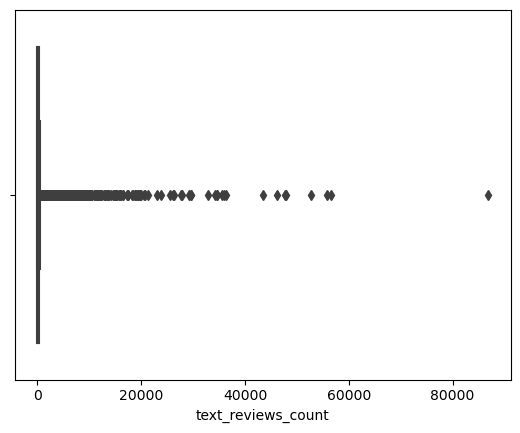

In [105]:
# Creating Boxplot for "text_reviews_count" attribute
sns.boxplot(x=books_df['text_reviews_count'])
plt.show()

In [106]:
#Remove Outliers
(books_df.text_reviews_count > 80000).sum()  

1

In [107]:
OutliersTRC = books_df.loc[books_df['text_reviews_count'] > 80000]
books_df.drop(index=OutliersTRC.index, inplace=True) 

### New Dataframe after cleaning

In [108]:
books_df.shape           #New number of rows after removing anomalies & outliers

(11044, 12)

In [109]:
books_df.describe()       #New description of the dataset : Min starts now at 1.

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11044.000000,1.104400e+04,11044.000000,1.104400e+04,11044.000000
mean,3.943127,9.759725e+12,338.052027,1.751760e+04,529.524357
std,0.295193,4.445537e+11,228.082135,1.031579e+05,2283.371504
min,1.000000,8.987060e+09,1.000000,1.000000e+00,0.000000
25%,3.780000,9.780345e+12,198.000000,1.100000e+02,9.000000
50%,3.960000,9.780574e+12,304.000000,7.640000e+02,48.000000
75%,4.140000,9.780872e+12,416.000000,5.052000e+03,241.000000
max,5.000000,9.790008e+12,3400.000000,2.530894e+06,56604.000000


In [110]:
books_df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Genre
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652.0,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy & paranormal
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy & paranormal
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352.0,6333,244,11/1/2003,Scholastic,Fantasy & paranormal
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435.0,2339585,36325,5/1/2004,Scholastic Inc.,Children
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690.0,41428,164,9/13/2004,Scholastic,Fantasy & paranormal


## PRE-PROCESSING DATA



In [111]:
#Normalizing language_code attribute 

print("Original values:" , books_df['language_code'].unique()) 

books_df.loc[books_df['language_code'].str.contains('en-'), 'language_code'] = 'eng'  # Normalizing 'eng' code 
print("New values:" , books_df['language_code'].unique())     #Checking new unique value


Original values: ['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor'
 'tur' 'gla' 'ale']
New values: ['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


In [112]:
#Encoding Language_code attribute

label_encoder = LabelEncoder()     
label_encoder.fit_transform(books_df['language_code'])

books_df['language_code_label']=label_encoder.fit_transform(books_df['language_code'])
books_df['language_code_label'].value_counts()

language_code_label
2     10475
18      212
4       140
5        96
10       45
13       19
22       14
16       10
8         9
9         5
11        3
3         3
17        2
19        2
14        1
1         1
12        1
7         1
21        1
15        1
20        1
6         1
0         1
Name: count, dtype: int64

In [113]:
# EXTRACTING YEAR OF PUBLICATION DATE  

# Conversion of the column "publication_date" in datetime type
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce')

# Extraction of the year of publication in a new column "publication_year"
books_df['publication_year'] = books_df['publication_date'].dt.year

# Dropping missing values in column "publication_year"
books_df.dropna(subset=['publication_year'], inplace=True)

# Dropping rows with negative years
books_df = books_df[books_df['publication_year'] > 0]

In [114]:
#ENCODING TITLE COLUMN

label_encoder_T = LabelEncoder()      #Saving LabelEncoder() in the object  label_encoder_T
label_encoder_T.fit_transform(books_df['title'])

books_df['title_label']=label_encoder_T.fit_transform(books_df['title'])
books_df['title_label'].value_counts()

title_label
7778    9
6879    9
2954    8
624     8
2       8
       ..
9991    1
8306    1
8305    1
4711    1
3909    1
Name: count, Length: 10271, dtype: int64

In [115]:
#ENCODING AUTHORS COLUMN

label_encoder_A = LabelEncoder()      #Saving LabelEncoder() in the object  label_encoder_A
label_encoder_A.fit_transform(books_df['authors'])

books_df['authors_label']=label_encoder_A.fit_transform(books_df['authors'])
books_df['authors_label'].value_counts()

authors_label
4700    40
5735    40
5419    38
4664    35
45      33
        ..
27       1
4394     1
6001     1
115      1
6500     1
Name: count, Length: 6583, dtype: int64

In [116]:
#ENCODING PUBLISHER COLUMN

label_encoder_P = LabelEncoder()                                #Saving LabelEncoder() in the object  label_encoder_P
label_encoder_P.fit_transform(books_df['publisher'])

books_df['publisher_label']=label_encoder_A.fit_transform(books_df['publisher'])
books_df['publisher_label'].value_counts()

publisher_label
2094    318
1460    261
1477    184
1206    149
186     144
       ... 
991       1
1056      1
729       1
1464      1
1919      1
Name: count, Length: 2254, dtype: int64

In [117]:
#ENCODING GENRE COLUMN

label_encoder_G = LabelEncoder()                                #Saving LabelEncoder() in the object  label_encoder_G
label_encoder_G.fit_transform(books_df['Genre'])

books_df['Genre_label']=label_encoder_A.fit_transform(books_df['Genre'])
books_df['Genre_label'].value_counts()

Genre_label
3     2784
4     1906
6     1431
7     1231
2     1190
0      704
5      626
1      398
9      319
8      293
10     160
Name: count, dtype: int64

In [118]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'Genre', 'language_code_label', 'publication_year',
       'title_label', 'authors_label', 'publisher_label', 'Genre_label'],
      dtype='object')

In [119]:
books_df.shape

(11042, 18)

In [120]:
#Saving encoded dataset for the Classification part 

books_df.to_csv('FusionBooks_encoded.csv', index=False)

## VISUALIZATION

### Histogram & Correlation Matrix 

We will try to find the correlation between the data

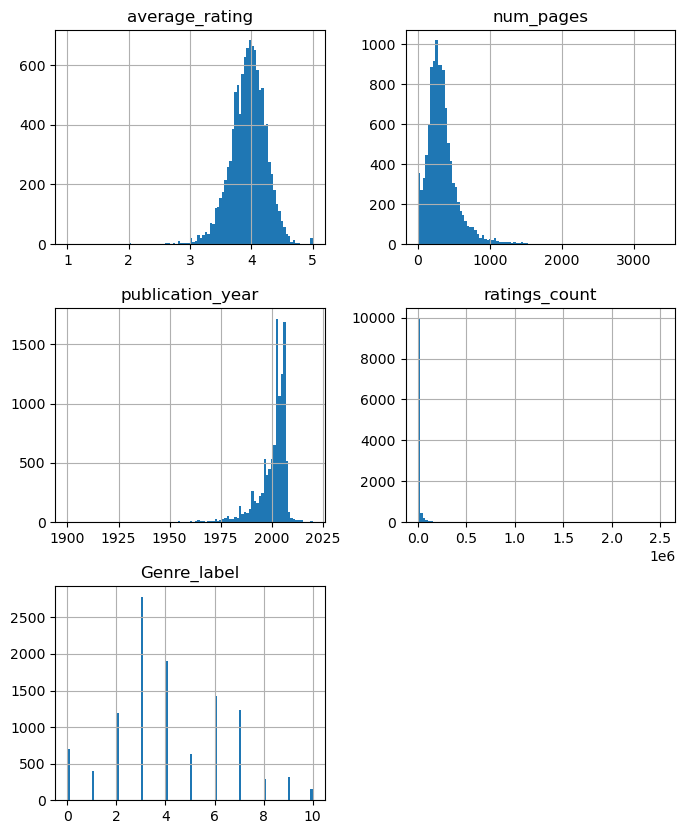

In [121]:
# HISTOGRAM VISUALIZATION 

selected_columns = ['average_rating', 'num_pages', 'publication_year', 'ratings_count', 'Genre_label' ]  # Remplacez par les noms de vos colonnes

books_df[selected_columns].hist(bins=100, figsize=(8, 10))
plt.show()

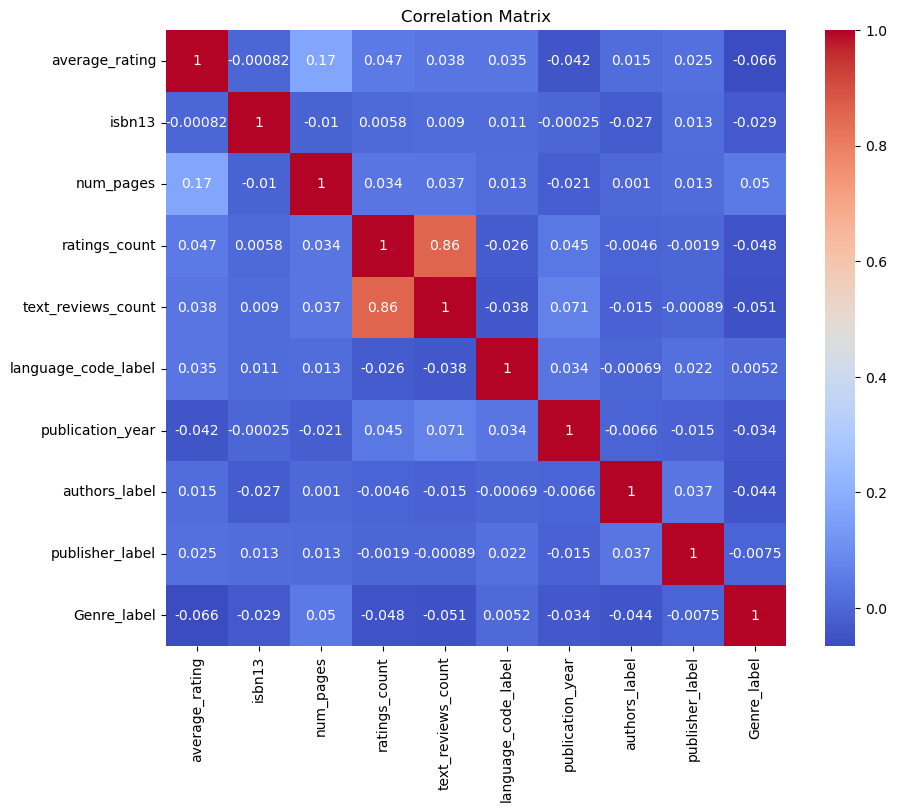

In [122]:
# CORRELATION MATRIX 

selected_columns = ['average_rating', 'isbn13',
       'num_pages', 'ratings_count', 'text_reviews_count', 'language_code_label', 'publication_year',
       'authors_label','publisher_label', 'Genre_label']
selected_data = books_df[selected_columns]

correlation = selected_data.corr()

# Printing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [123]:
#Visualizing global average_rating distribution

books_df.average_rating.describe()

count    11042.000000
mean         3.943112
std          0.295216
min          1.000000
25%          3.780000
50%          3.960000
75%          4.140000
max          5.000000
Name: average_rating, dtype: float64

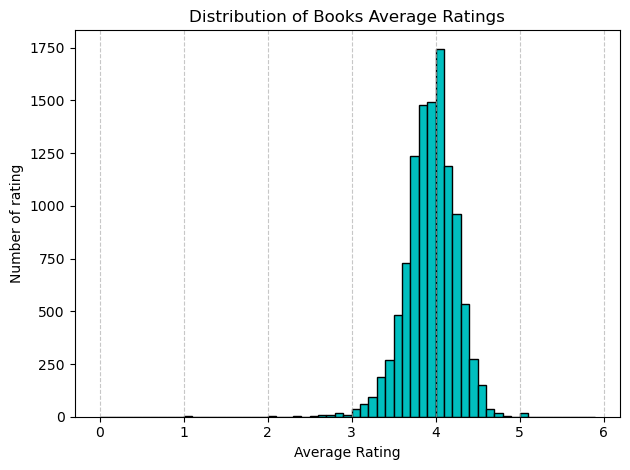

In [124]:
# Distribution of books average_ratings

average_rating_list = books_df['average_rating']

bins = np.arange(0, 6, 0.1)                              

plt.hist(average_rating_list, bins=bins, color='c', edgecolor='black')

plt.xlabel('Average Rating')                             
plt.ylabel('Number of rating')
plt.title('Distribution of Books Average Ratings')
plt.grid(axis='x', linestyle='--', alpha=0.7)             
plt.tight_layout()                                       
plt.show()

In [125]:
# Histogram transcription : Rounding at 0.1

rounded_ratings = pd.Series(average_rating_list).round(1).value_counts().sort_index().reset_index()
rounded_ratings.columns = ['Average Rating', 'Number of Rating']

print(rounded_ratings)

    Average Rating  Number of Rating
0              1.0                 2
1              1.7                 1
2              2.0                 5
3              2.3                 1
4              2.4                 1
5              2.5                 1
6              2.6                 6
7              2.7                 5
8              2.8                16
9              2.9                13
10             3.0                28
11             3.1                43
12             3.2                78
13             3.3               111
14             3.4               263
15             3.5               333
16             3.6               665
17             3.7               824
18             3.8              1457
19             3.9              1435
20             4.0              1816
21             4.1              1311
22             4.2              1245
23             4.3               642
24             4.4               448
25             4.5               149
2

In [126]:
# 10 MOST RATED BOOKS
top_10_most_rated_books = books_df.nlargest(10, 'ratings_count')[['title', 'authors','ratings_count','average_rating']]
print(top_10_most_rated_books)

                                                    title  \
bookID                                                      
5907                  The Hobbit  or There and Back Again   
5107                               The Catcher in the Rye   
960                  Angels & Demons (Robert Langdon  #1)   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
15881   Harry Potter and the Chamber of Secrets (Harry...   
2       Harry Potter and the Order of the Phoenix (Har...   
34      The Fellowship of the Ring (The Lord of the Ri...   
7613                                          Animal Farm   
1       Harry Potter and the Half-Blood Prince (Harry ...   
7624                                    Lord of the Flies   

                                        authors  ratings_count  average_rating  
bookID                                                                          
5907                             J.R.R. Tolkien        2530894            4.27  
5107                    

In [127]:
# TOP 10 AUTHORS
author_counts = books_df['authors'].value_counts()
sorted_authors = author_counts.sort_values(ascending=False)          # sorting the results
print(sorted_authors.head(10)) 

authors
P.G. Wodehouse         40
Stephen King           40
Rumiko Takahashi       38
Orson Scott Card       35
Agatha Christie        33
Piers Anthony          30
Mercedes Lackey        29
Sandra Brown           29
Dick Francis           28
Laurell K. Hamilton    23
Name: count, dtype: int64


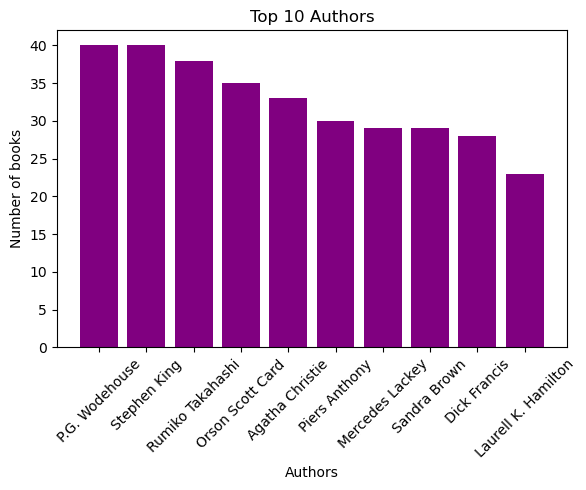

In [128]:
plt.figure(figsize=(6, 5))
plt.bar(sorted_authors.head(10).index, sorted_authors.head(10).values, color='purple')  # Spécifier la couleur violette
plt.xticks(rotation=45)
plt.xlabel('Authors')
plt.ylabel('Number of books')
plt.title('Top 10 Authors')
plt.tight_layout()
plt.show()

In [129]:
# TOP 3 LANGUAGES 

language_counts = books_df['language_code'].value_counts()
sorted_languages = language_counts.sort_values(ascending=False)          
print(sorted_languages.head(3)) 

language_code
eng    10474
spa      212
fre      139
Name: count, dtype: int64


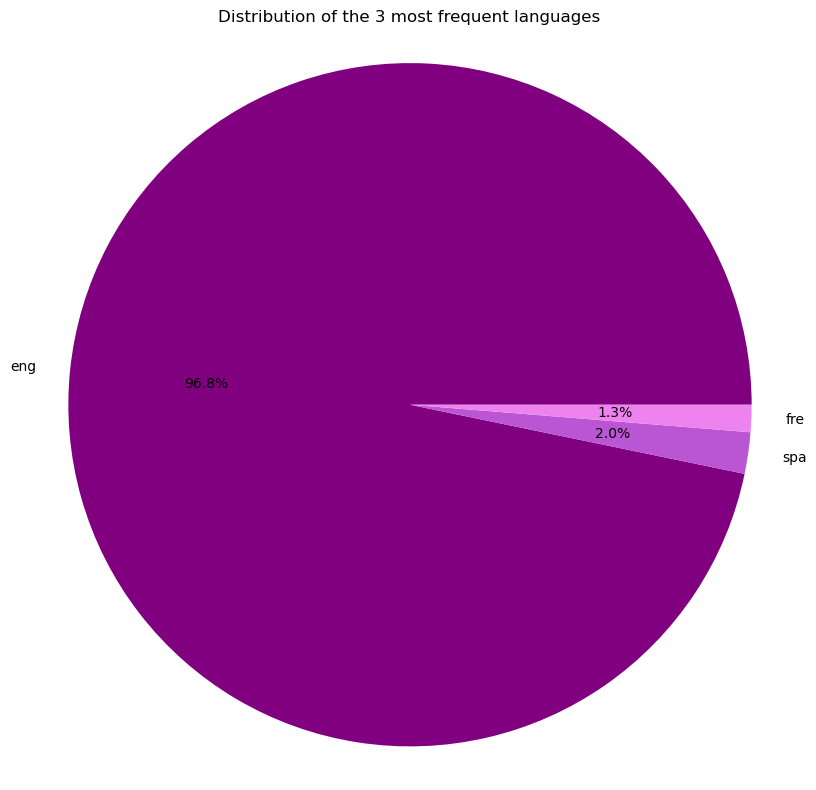

In [130]:
plt.figure(figsize=(8, 8))
plt.pie(sorted_languages.head(3).values, labels=sorted_languages.head(3).index, colors=['purple', 'mediumorchid', 'violet'], autopct='%1.1f%%')
plt.title('Distribution of the 3 most frequent languages')
plt.axis('equal')  
plt.tight_layout()
plt.show()

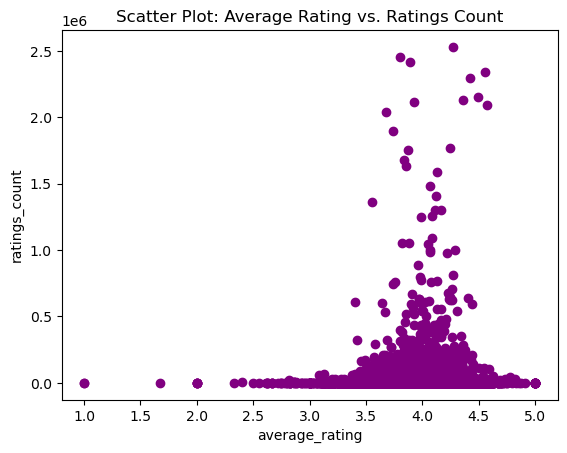

In [131]:
# SCATTER PLOT : AVERAGE RATING vs. RATINGS COUNT

average_rating = books_df['average_rating']
ratings_count = books_df['ratings_count']

plt.scatter(average_rating, ratings_count, color='purple', marker='o')      
plt.xlabel('average_rating')
plt.ylabel('ratings_count')
plt.title('Scatter Plot: Average Rating vs. Ratings Count')

plt.show()

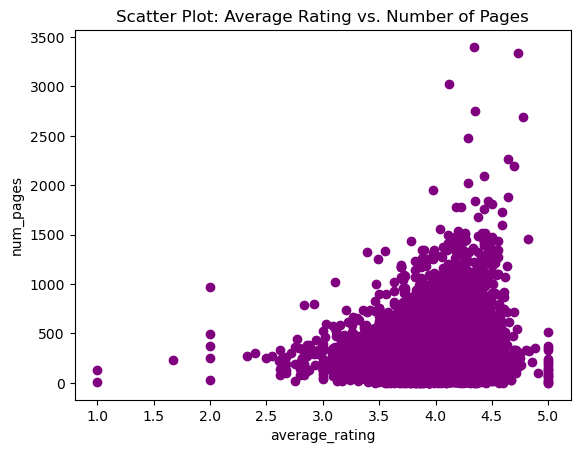

In [132]:
# SCATTER PLOT : AVERAGE RATING vs. NUMBER OF PAGES

average_rating = books_df['average_rating']
num_pages = books_df['num_pages']

plt.scatter(average_rating, num_pages, color='purple', marker='o')    
plt.xlabel('average_rating')
plt.ylabel('num_pages')
plt.title('Scatter Plot: Average Rating vs. Number of Pages')

plt.show()

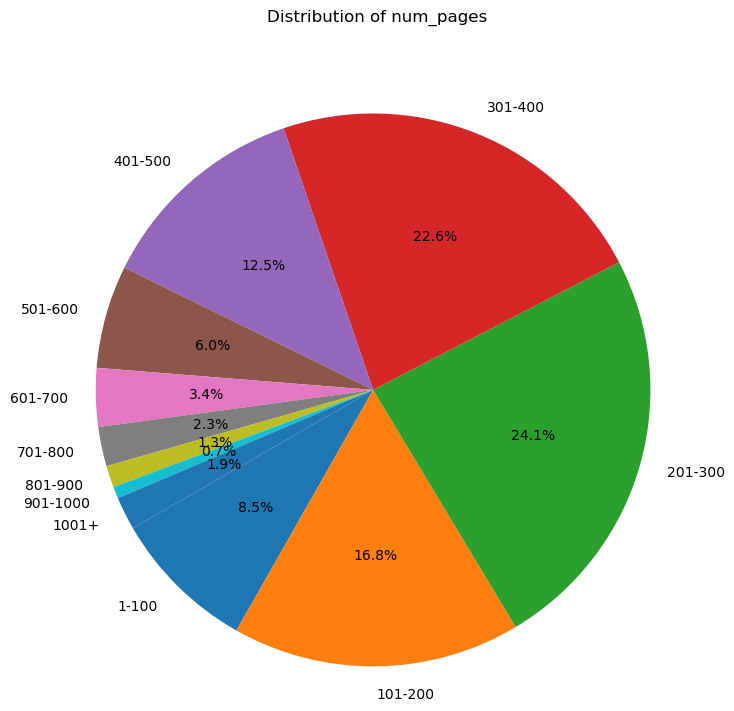

In [133]:
# Distribution of the number of pages 

bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['1-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001+']
books_df['page_category'] = pd.cut(books_df['num_pages'], bins=bins, labels=labels, right=False)
overview = books_df['page_category'].value_counts(sort=False)

overview = overview.reindex(labels)  

plt.figure(figsize=(8, 8))
plt.pie(overview, labels=overview.index, autopct='%1.1f%%', startangle=210)
plt.title('Distribution of num_pages', y=1.08)
plt.axis('equal')
plt.show()

In [134]:
books_df['num_pages'] = books_df['num_pages'].astype(int)

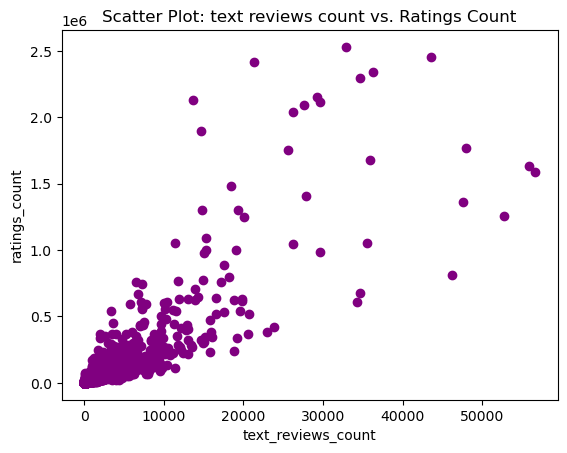

In [135]:
# SCATTER PLOT : TEXT REVIEW COUNT vs. RATINGS COUNT

text_reviews_count = books_df['text_reviews_count']
ratings_count = books_df['ratings_count']

plt.scatter(text_reviews_count, ratings_count, color='purple', marker='o')      # Creating the Scatter Plot 
plt.xlabel('text_reviews_count')
plt.ylabel('ratings_count')
plt.title('Scatter Plot: text reviews count vs. Ratings Count')

plt.show()

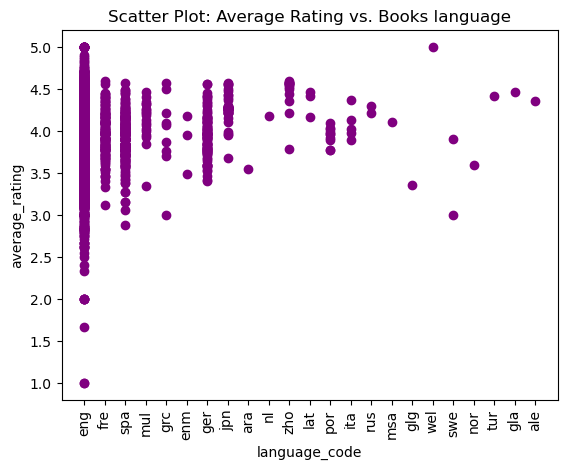

In [136]:
# SCATTER PLOT : AVERAGE RATING vs. BOOKS LANGUAGE

average_rating = books_df['average_rating']
language_code = books_df['language_code']

plt.scatter(language_code, average_rating, color='purple', marker='o')      # Creating the Scatter Plot 
plt.xlabel('language_code')
plt.ylabel('average_rating')
plt.title('Scatter Plot: Average Rating vs. Books language')

#Put name of axis x in vertical position
plt.xticks(rotation='vertical')

plt.show()

In [137]:
# Selecting columns for the Linear regression Model 
books_df = books_df.drop(columns=['title', 'authors', 'isbn','isbn13', 'language_code', 'publication_date',
       'publisher', 'publication_year',
       'title_label', 'authors_label', 'publisher_label', 'text_reviews_count', 'page_category', 'Genre'])

In [138]:
books_df  

,average_rating,num_pages,ratings_count,language_code_label,Genre_label
bookID,,,,,
1,4.57,652,2095690,2,2
2,4.49,870,2153167,2,2
4,4.42,352,6333,2,2
5,4.56,435,2339585,2,0
8,4.78,2690,41428,2,2
...,...,...,...,...,...
45631,4.06,512,156,2,3
45633,4.08,635,783,2,3
45634,3.96,415,820,2,4


# TESTING & TRAINING THE MODELS

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression                #Importing Linear regression Model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

In [152]:
X = books_df.drop('average_rating', axis=1)
y = books_df['average_rating']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
len(books_df)  #total

11042

In [155]:
print('X_train :' , X_train.shape)
print('y_train :' , y_train.shape)

X_train : (8833, 4)
y_train : (8833,)


In [156]:
print('X_test :' , X_test.shape)
print('y_test :' , y_test.shape)

X_test : (2209, 4)
y_test : (2209,)


## REGRESSION

### Linear Regression Model

In [157]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = lr_model.predict(X_test)

In [159]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 0.287
MAE: 0.219
R²: 0.044


In [160]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) : {:.3f}".format(mse))
print("R-squared (R²) : {:.3f}".format(r2))

Mean Squared Error (MSE) : 0.082
R-squared (R²) : 0.044


Évaluation réelle : 4.29, Évaluation prédictive : 4.02
Évaluation réelle : 3.97, Évaluation prédictive : 3.93
Évaluation réelle : 4.21, Évaluation prédictive : 3.97
Évaluation réelle : 4.06, Évaluation prédictive : 3.89
Évaluation réelle : 3.03, Évaluation prédictive : 4.01
Évaluation réelle : 3.89, Évaluation prédictive : 3.92
Évaluation réelle : 3.95, Évaluation prédictive : 3.91
Évaluation réelle : 4.05, Évaluation prédictive : 3.93
Évaluation réelle : 4.28, Évaluation prédictive : 3.95
Évaluation réelle : 3.12, Évaluation prédictive : 3.92
Évaluation réelle : 4.06, Évaluation prédictive : 3.89
Évaluation réelle : 4.09, Évaluation prédictive : 3.96
Évaluation réelle : 3.97, Évaluation prédictive : 3.94
Évaluation réelle : 3.86, Évaluation prédictive : 3.84
Évaluation réelle : 4.39, Évaluation prédictive : 3.87
Évaluation réelle : 3.99, Évaluation prédictive : 4.05
Évaluation réelle : 4.23, Évaluation prédictive : 4.02
Évaluation réelle : 4.27, Évaluation prédictive : 3.94
Évaluation

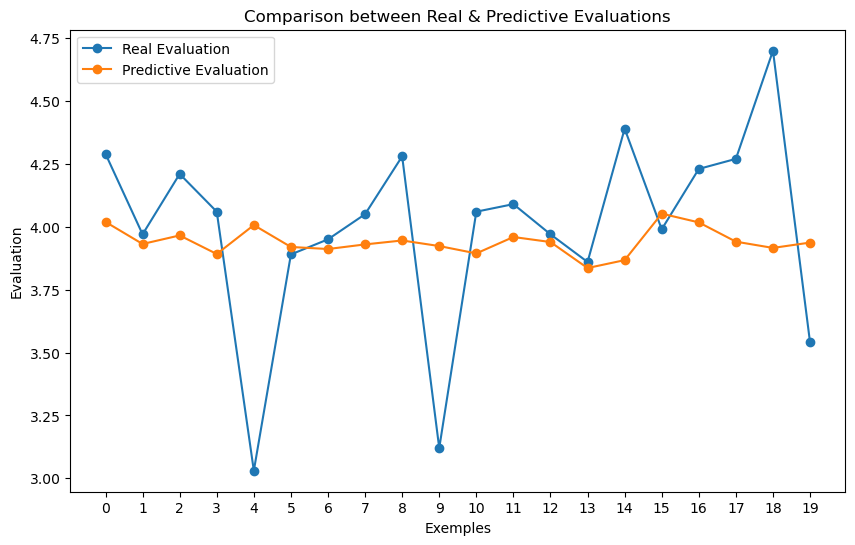

In [161]:
comparison = list(zip(y_test, y_pred))
num_rows_to_display = 20

real_evaluations = []
predicted_evaluations = []

for i in range(num_rows_to_display):
    real_eval, predicted_eval = comparison[i]
    formatted_predicted_eval = format(predicted_eval, ".2f")
    print(f"Évaluation réelle : {real_eval}, Évaluation prédictive : {formatted_predicted_eval}")
    
    real_evaluations.append(real_eval)
    predicted_evaluations.append(predicted_eval)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(num_rows_to_display), real_evaluations, marker='o', label='Real Evaluation')
plt.plot(range(num_rows_to_display), predicted_evaluations, marker='o', label='Predictive Evaluation')
plt.xlabel('Exemples')
plt.ylabel('Evaluation')
plt.title('Comparison between Real & Predictive Evaluations')
plt.legend()
plt.xticks(range(num_rows_to_display))
plt.show()

# CLASSIFICATION 

In [162]:
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [163]:
# Importing Encoded Dataset

books_Encoded = pd.read_csv(r"C:\Users\ociri\ML GROUP_PROJECT\FusionBooks_encoded.csv", sep=",", encoding='utf-8')

In [164]:
# Separating rates into 2 groups : 4.2 and OVER = excellent (1) / Other ones = average or bad (0)
books_Encoded['average_rating'] = books_Encoded['average_rating'].apply(lambda x: 1 if x >= 4.2 else 0)
print(books_Encoded['average_rating'].value_counts())

average_rating
0    9052
1    1990
Name: count, dtype: int64


In [165]:
# Dropping columns we don't need 
books_Encoded= books_Encoded.drop(columns=['title', 'authors', 'isbn','isbn13', 'language_code', 'text_reviews_count', 'publication_date',
       'publisher',
       'title_label', 'authors_label', 'publisher_label', 'publication_year', 'Genre' ])

In [166]:
books_Encoded

,average_rating,num_pages,ratings_count,language_code_label,Genre_label
0,1,652.0,2095690,2,2
1,1,870.0,2153167,2,2
2,1,352.0,6333,2,2
3,1,435.0,2339585,2,0
4,1,2690.0,41428,2,2
...,...,...,...,...,...
11037,0,512.0,156,2,3
11038,0,635.0,783,2,3
11039,0,415.0,820,2,4
11040,0,434.0,769,2,6


In [167]:
X = books_Encoded.drop('average_rating', axis=1)
y = books_Encoded['average_rating']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=books_Encoded.average_rating)

### Decision Tree Model

In [169]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [170]:
dtree_model_pred = dtree_model.predict(X_test)
dtree_model_acc = accuracy_score(dtree_model_pred, y_test)
print('Test accuracy is : {:.2f}%'.format(dtree_model_acc*100))

Test accuracy is : 74.15%


In [171]:
print(classification_report(y_test, dtree_model_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1811
           1       0.30      0.32      0.31       398

    accuracy                           0.74      2209
   macro avg       0.57      0.58      0.58      2209
weighted avg       0.75      0.74      0.75      2209



TN:  1509
FN:  269
TP:  129
FP:  302


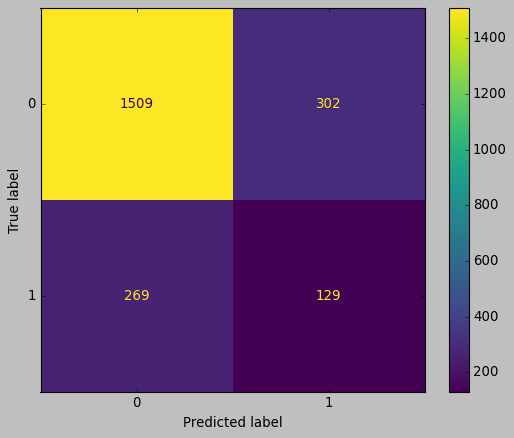

In [172]:
style.use('classic')
cm=confusion_matrix(y_test, dtree_model_pred, labels = dtree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree_model.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### Random Forest Model 

In [173]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [174]:
rforest_model_pred = rforest_model.predict(X_test)
rforest_model_acc = accuracy_score(rforest_model_pred, y_test)
print('Test accuracy is : {:.2f}%'.format(rforest_model_acc*100))

Test accuracy is : 81.21%


In [175]:
print(classification_report(y_test, rforest_model_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1811
           1       0.46      0.25      0.33       398

    accuracy                           0.81      2209
   macro avg       0.66      0.59      0.61      2209
weighted avg       0.78      0.81      0.79      2209



TN:  1693
FN:  297
TP:  101
FP:  118


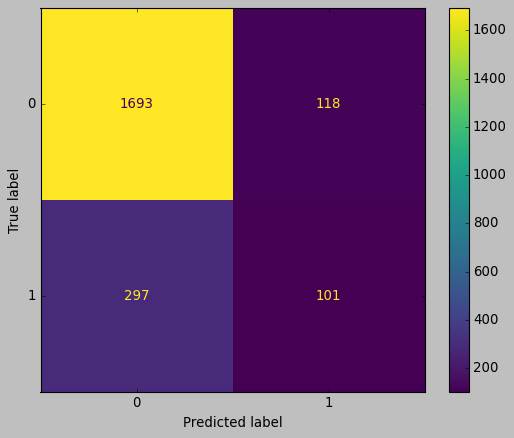

In [176]:
style.use('classic')
cm=confusion_matrix(y_test, rforest_model_pred, labels = rforest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rforest_model.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### Logistic Regression Model 

In [177]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [178]:
logreg_model_pred = logreg_model.predict(X_test)
logreg_model_acc = accuracy_score(logreg_model_pred, y_test)
print('Test accuracy is : {:.2f}%'.format(logreg_model_acc*100))

Test accuracy is : 81.98%


In [179]:
print(classification_report(y_test, logreg_model_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1811
           1       1.00      0.00      0.00       398

    accuracy                           0.82      2209
   macro avg       0.91      0.50      0.45      2209
weighted avg       0.85      0.82      0.74      2209



TN:  1811
FN:  398
TP:  0
FP:  0


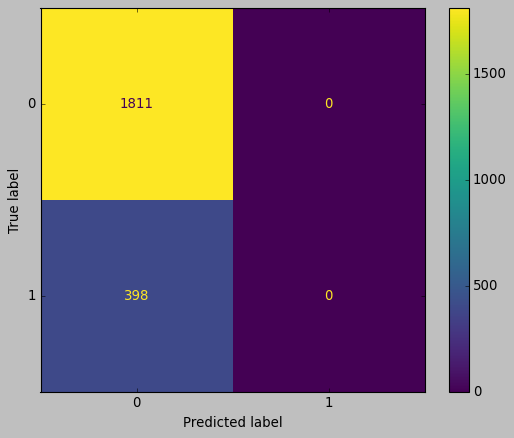

In [180]:
style.use('classic')
cm=confusion_matrix(y_test, logreg_model_pred, labels = logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg_model.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# OPTIMIZATION : Oversampling with SMOTE Method

Given our decision to set the rating threshold at 4.2, I believed it was useful to increase the data for minority numbers in order to optimize our model.

In [181]:
!pip install imbalanced-learn

In [182]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [183]:
# Importing Encoded Dataset

books_Encoded = pd.read_csv(r"C:\Users\ociri\ML GROUP_PROJECT\FusionBooks_encoded.csv", sep=",", encoding='utf-8')

In [184]:
# Separating rates into 2 groups : 4.2 & over = excellent (1) / Other ones = average or bad (0)
books_Encoded['average_rating'] = books_Encoded['average_rating'].apply(lambda x: 1 if x >= 4.2 else 0)
y = books_Encoded['average_rating']

In [185]:
# Verifying data prior to use SMOTE Mothod 

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print("Classes in y:", np.unique(y))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Classes in y: [0 1]
Shape of X: (11042, 4)
Shape of y: (11042,)


In [186]:
X = books_Encoded[['language_code_label', 'num_pages', 'ratings_count','Genre_label']]
y = books_Encoded['average_rating']

In [187]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


### Random Forest - SMOTE

In [189]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=42)

In [190]:
# Training the model 
clf_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred = clf_RF.predict(X_test)

y_acc = accuracy_score(y_pred, y_test)
print('Test accuracy is : {:.2f}%'.format(y_acc*100))

Test accuracy is : 76.19%


In [192]:
#Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1811
           1       0.76      0.77      0.76      1810

    accuracy                           0.76      3621
   macro avg       0.76      0.76      0.76      3621
weighted avg       0.76      0.76      0.76      3621

[[1369  442]
 [ 420 1390]]


TN:  1369
FN:  420
TP:  1390
FP:  442


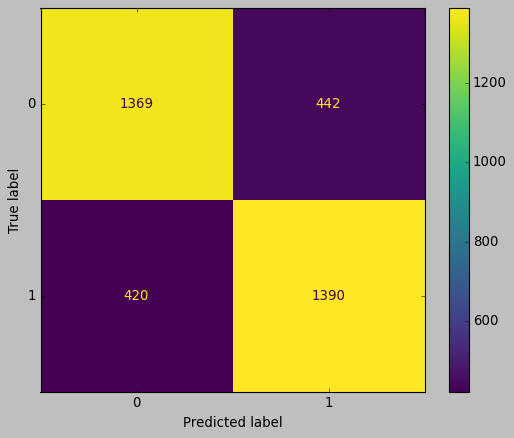

In [193]:
style.use('classic')
cm=confusion_matrix(y_test, y_pred, labels = clf_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_RF.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### Decision Tree - SMOTE

In [194]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=42)

In [195]:
# Training the model
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [196]:
# Prediction
y_pred = clf_DT.predict(X_test)

y_acc = accuracy_score(y_pred, y_test)
print('Test accuracy is : {:.2f}%'.format(y_acc*100))

Test accuracy is : 72.77%


In [197]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1811
           1       0.72      0.74      0.73      1810

    accuracy                           0.73      3621
   macro avg       0.73      0.73      0.73      3621
weighted avg       0.73      0.73      0.73      3621


Confusion Matrix:
 [[1298  513]
 [ 473 1337]]


TN:  1298
FN:  473
TP:  1337
FP:  513


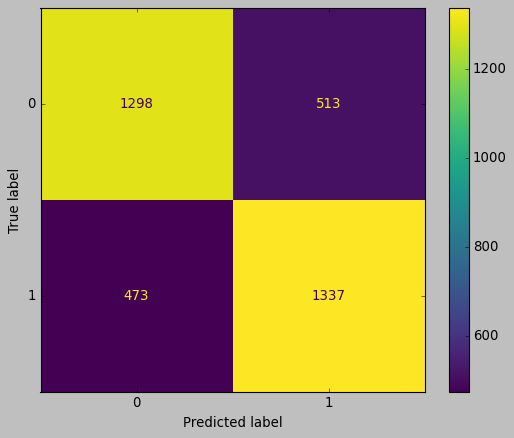

In [198]:
style.use('classic')
cm=confusion_matrix(y_test, y_pred, labels = clf_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_DT.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### Logistic Regression - SMOTE 

In [199]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=10000)

In [200]:
#Training the model 
logreg.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=10000, random_state=42)

In [201]:
# Prediction
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 49.99%


In [202]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1811
           1       0.50      1.00      0.67      1810

    accuracy                           0.50      3621
   macro avg       0.75      0.50      0.33      3621
weighted avg       0.75      0.50      0.33      3621



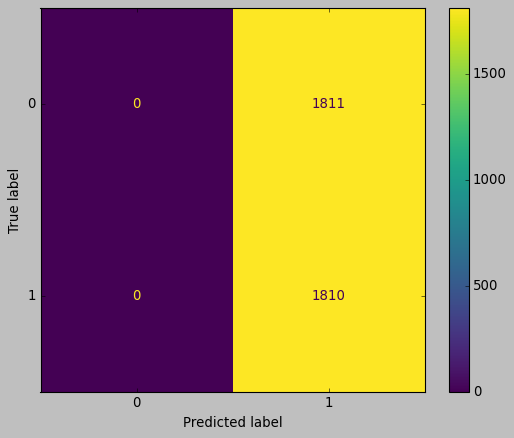

TN:  0
FN:  0
TP:  1810
FP:  1811


In [203]:
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

## CONCLUSION

The linear regression model is clearly not suitable for this problem. This was initially evident through the correlation matrix, which showed very little linearity between the data.

On the other hand, classification models yield better results, even if they are not perfect. 
Decision Tree and Random Forest models provide good accuracy; however, there is an imbalance in the data distribution, affecting the reliability of the models. 

The use of oversampling with the SMOTE method corrects this imbalance and results in higher precision, recall, and F1-scores.

With or without the SMOTE method, logistic regression does not produce good results. Like ‘linear regression’, it's a model to be avoided for this type of problem.


## IMPROVEMENT PROPOSAL 

#### Undersampling: 
Based on the statistical report, we observed that the target data is primarily skewed towards higher average ratings. Rebalancing the majority class could help stabilize the model. Given that oversampling has proven effective, it is reasonable to assume that undersampling might be effective as well.

#### Hyperparameter Tuning: 
Throughout this project, we've seen that classification models yield the best results. Hyperparameter tuning, particularly effective for the Random Forest model, is worth exploring.

#### Feature Engineering: 
Modifying the data combination, removing more outliers, and adding new columns are also worth exploring. 

#### Other Models: 
Trying out other models, ideally classification ones, could be beneficial given that this approach has so far been the most suitable for the problem at hand (such as Gradient Boosting Classifier, XGBoost, etc.).